# Practicel ML - KNN

### Full Name : Hooman Zolfaghari
### Student Number : 99100036

In this Notebook, we will implement KNN for the given dataset. This notebook has 3 phases, in the first phase we explore dataset, in the second phase we preprocess the dataset and in the last phase we implement KNN from scratch and also with sklearn and train it on the dataset.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Inspect the first rows of the dataframe

In [29]:
# TODO
df = pd.read_csv('train.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,36,No,Travel_Rarely,884,Sales,1,4,Life Sciences,1,1585,...,1,80,0,15,5,3,1,0,0,0
2,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
3,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
4,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8


Calculate the number of samples

In [30]:
# TODO
len(df)


1102

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1102 non-null   int64 
 1   Attrition                 1102 non-null   object
 2   BusinessTravel            1102 non-null   object
 3   DailyRate                 1102 non-null   int64 
 4   Department                1102 non-null   object
 5   DistanceFromHome          1102 non-null   int64 
 6   Education                 1102 non-null   int64 
 7   EducationField            1102 non-null   object
 8   EmployeeCount             1102 non-null   int64 
 9   EmployeeNumber            1102 non-null   int64 
 10  EnvironmentSatisfaction   1102 non-null   int64 
 11  Gender                    1102 non-null   object
 12  HourlyRate                1102 non-null   int64 
 13  JobInvolvement            1102 non-null   int64 
 14  JobLevel                

Measure the number of unique values for each column. Note that Attrition is the target column.

In [32]:
# TODO
less_than_ones = []
for col in df.columns:
    unique_lenght = len(df[col].unique())
    if(unique_lenght < 2) :less_than_ones.append(col)
    print(col,unique_lenght)

Age 43
Attrition 2
BusinessTravel 3
DailyRate 736
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1102
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 1027
MonthlyRate 1082
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 34
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 17


Check if there is a column with less than two unique values. If such a columns exists, remove it!

In [33]:
# TODO
valid_df = df.drop(columns=less_than_ones)

Plot Mean BusinessTravel against Age. Note: Since the BusinessTravel column is categorical, you should first consider another column corresponding to each unique value BusinessTravel takes. For instance, you may assume that if someone does not travel, the value of the column for this person is 0.

In [34]:
# handle uniqueness
# TODO
unique_values = df['BusinessTravel'].unique()


In [35]:
# Map the column

# TODO
df['BusinessTravel_Encoded'] = df['BusinessTravel'].map({ col : index for index, col in enumerate(unique_values) })


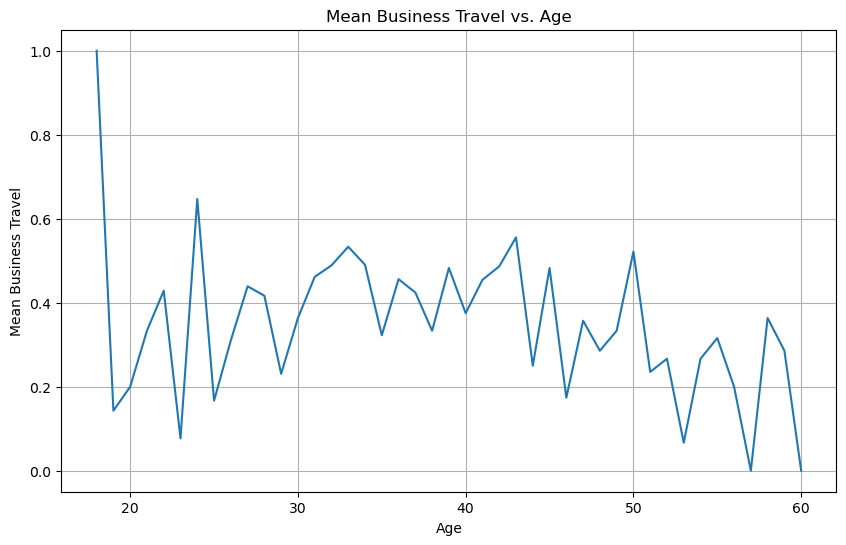

In [36]:
# plot

# TODO
mean_business_travel = df.groupby('Age')['BusinessTravel_Encoded'].mean()

# plt.figure(figsize=(10, 6))
# plt.hist(mean_business_travel, bins=20, color='b', edgecolor='black')
# plt.xlabel('Mean Business Travel')
# plt.ylabel('Frequency')
# plt.title('Distribution of Mean Business Travel by Age')
# plt.grid(True)
# plt.show()

plt.figure(figsize=(10, 6))
plt.plot(mean_business_travel.index, mean_business_travel.values)
plt.xlabel('Age')
plt.ylabel('Mean Business Travel')
plt.title('Mean Business Travel vs. Age')
plt.grid(True)
plt.show()

df = df.drop(columns='BusinessTravel_Encoded')

Check if there seems to be a meaningful relationship between people's age and the years they have worked with their current manager. Your result should be a plot.

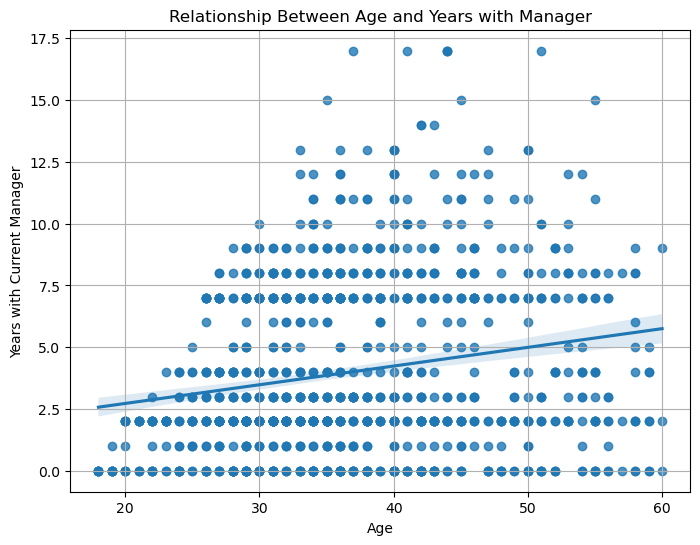

In [37]:
# TODO
plt.figure(figsize=(8, 6))
#plt.plot(df['Age'], df['YearsWithCurrManager'], color='b', marker='o')
sns.regplot(x =df['Age'], y = df['YearsWithCurrManager'])
plt.xlabel('Age')
plt.ylabel('Years with Current Manager')
plt.title('Relationship Between Age and Years with Manager')
plt.grid(True)
plt.show()

Plot the average MonthlyIncome against the YearsAtCompany. 

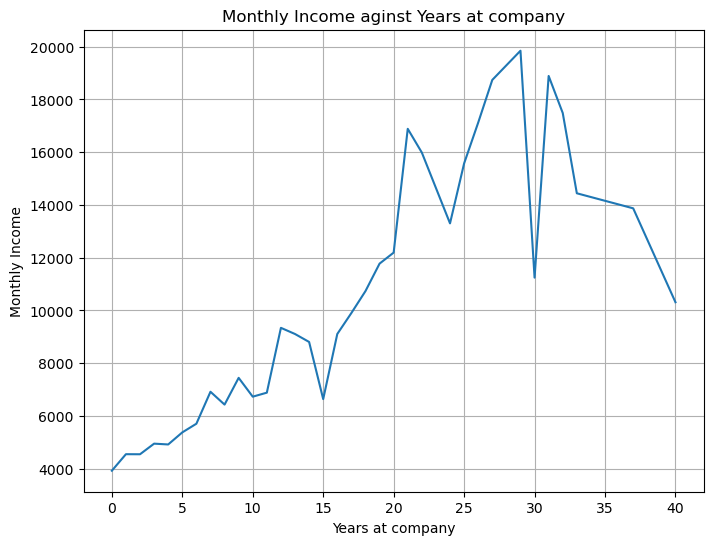

In [38]:
# TODO
data = df.groupby('YearsAtCompany')['MonthlyIncome'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.lineplot(x='YearsAtCompany', y='MonthlyIncome', data=data)
plt.xlabel('Years at company')
plt.ylabel('Monthly Income')
plt.title('Monthly Income aginst Years at company')
plt.grid(True)
plt.show()

## Preprocessing

Label encode all categorical columns and split the data into train and test parts. The training part will further splitted into train and validation parts.

In [39]:
# Label encode
from numpy import dtype


categorical_columns = df.select_dtypes(exclude=np.number).columns
# TODO
print(categorical_columns)
label_encoder = LabelEncoder()
df_encoded = df.copy() 
for col in categorical_columns:
    df_encoded[col] = label_encoder.fit_transform(df[col])
    
y = df_encoded['Attrition']
X = df_encoded.drop(columns=['Attrition'])

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [40]:
# split into train and validation
# TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [41]:
# lens of train and validation datasets
# TODO
print('train X:', X_train.shape, 'val X:', X_val.shape, 'test X:', X_test.shape)
print('train y:', y_train.shape, 'val y:',y_val.shape, 'test y', y_test.shape)

train X: (704, 34) val X: (177, 34) test X: (221, 34)
train y: (704,) val y: (177,) test y (221,)


Split the test and validation dataframe into feature and label part, Attrition columns is the target columns and rest of the columns should be treated as features. (Note that win_or_defeat column is the target column)

In [42]:
# TODO
# i did it at the beginning. doesn't make any difference.


# Model Implementation From Scratch
  



## How the algorithm works

**We calculate the euclidean distance between a new sample and all points**

**We determine the label of the sample based on the majority vote**

## Key Points:

### Euclidean Distance
**Euclidean distance is defined as the distance between two points**

**Where it's represented by this equation :
$$\sqrt{\sum\limits_{i = 0}^{m-1} (x - y)^2}$$**


In [43]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        # TODO
        self.k = k

    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (DataFrame): Training feature vectors.
        - y_train (Series): Training labels.
        """
        # TODO
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        """
        Calculate the distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Distance between x1 and x2.
        """
        # TODO
        # print(x1)
        # print(x2)
        return np.sqrt(np.sum((x1 - x2) ** 2))


    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (DataFrame): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        # TODO

        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        # TODO
        #  distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


# Evaluation
  

Define the model and train it.

In [44]:
# TODO
model = KNN()
model.fit(X_train=X_train.to_numpy(), y_train=y_train.to_numpy())

Predict the y_train and y_test values.

In [45]:
# TODO
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def print_evaluation(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    print('accuracy:',accuracy,'\n')
    classification_report_str = classification_report(y_true, y_pred)
    print('classification_report:',classification_report_str,'\n')
    conf_matrix = confusion_matrix(y_true, y_pred)
    print('conf matrix',conf_matrix,'\n')

y_pred = model.predict(X_train.to_numpy())
print('train:')
print_evaluation(y_train.to_numpy(), y_pred)
y_pred = model.predict(X_val.to_numpy())
print('val:')
print_evaluation(y_val.to_numpy(), y_pred)
y_pred = model.predict(X_test.to_numpy())
print('test:')
print_evaluation(y_test.to_numpy(), y_pred)


train:
accuracy: 0.8778409090909091 

classification_report:               precision    recall  f1-score   support

           0       0.89      0.97      0.93       586
           1       0.75      0.41      0.53       118

    accuracy                           0.88       704
   macro avg       0.82      0.69      0.73       704
weighted avg       0.87      0.88      0.86       704
 

conf matrix [[570  16]
 [ 70  48]] 

val:
accuracy: 0.7966101694915254 

classification_report:               precision    recall  f1-score   support

           0       0.82      0.95      0.88       143
           1       0.42      0.15      0.22        34

    accuracy                           0.80       177
   macro avg       0.62      0.55      0.55       177
weighted avg       0.75      0.80      0.76       177
 

conf matrix [[136   7]
 [ 29   5]] 

test:
accuracy: 0.7647058823529411 

classification_report:               precision    recall  f1-score   support

           0       0.83      0.90

# Sklearn Implementation
  

Define the sklearn knn model and fit to the training data

In [46]:
# TODO
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Now predict the defined model on test data and return the accuracy

In [47]:
# TODO
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7647058823529411


In [48]:
y_pred = knn_model.predict(X_train)
print('train:')
print_evaluation(y_train, y_pred)
y_pred = knn_model.predict(X_val)
print('val:')
print_evaluation(y_val, y_pred)
y_pred = knn_model.predict(X_test)
print('test:')
print_evaluation(y_test, y_pred)

train:
accuracy: 0.8778409090909091 

classification_report:               precision    recall  f1-score   support

           0       0.89      0.97      0.93       586
           1       0.75      0.41      0.53       118

    accuracy                           0.88       704
   macro avg       0.82      0.69      0.73       704
weighted avg       0.87      0.88      0.86       704
 

conf matrix [[570  16]
 [ 70  48]] 

val:
accuracy: 0.7966101694915254 

classification_report:               precision    recall  f1-score   support

           0       0.82      0.95      0.88       143
           1       0.42      0.15      0.22        34

    accuracy                           0.80       177
   macro avg       0.62      0.55      0.55       177
weighted avg       0.75      0.80      0.76       177
 

conf matrix [[136   7]
 [ 29   5]] 

test:
accuracy: 0.7647058823529411 

classification_report:               precision    recall  f1-score   support

           0       0.83      0.90

# Thank You


**Thank you for taking your time going through this notebook**

**If you have any feedback please let me know**